# **DNA Promoters Classification**

**by: Stefanus Felix**

In [8]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# ignore warnings
import warnings
warnings.filterwarnings("ignore") 

In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"

## **1. Import Dataset**

In [11]:
df = pd.read_csv(url, names = ["Class", "id", "Sequence"])
df

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [12]:
list_info = []
for i in df.columns :
    list_info.append([i,                                                        
                     df[i].dtype,                                            
                     df[i].isna().sum(),                                        
                     round((df[i].isna().sum()/len(df[i])) * 100,2),            
                     df[i].nunique(),                                           
                     list(df[i].unique())])                                    

df_info = pd.DataFrame(columns=["Feature", "Data Type", "Null Value", "Null Value Percentage", "Nunique", "Unique Values"],
                       data = list_info)
df_info

,Feature,Data Type,Null Value,Null Value Percentage,Nunique,Unique Values
0,Class,object,0,0.0,2,"[+, -]"
1,id,object,0,0.0,106,"[S10, AMPC, AROH, DEOP2, LEU1_TRNA, MALEFG, MA..."
2,Sequence,object,0,0.0,106,[\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataa...


In [13]:
df.drop(columns = "id", inplace = True)
df

,Class,Sequence
0,+,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...
101,-,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


Here's a breakdown of the classification:

- Positive Class ("+") (DNA Promoters): These are sequences of DNA that serve as promoters. They contain regulatory elements that are recognized by RNA polymerase and other transcription factors, initiating the transcription of nearby genes. Promoters are crucial for controlling gene expression and determining when and where a gene is transcribed.

- Negative Class ("−") (Non-Promoters): These are sequences of DNA that do not function as promoters. They may include coding regions of genes, introns, intergenic regions, or other non-regulatory sequences. Non-promoters do not initiate transcription and are not directly involved in gene expression regulation at the transcriptional level.

The classification task involves analyzing DNA sequences and identifying regions that exhibit characteristics typical of promoters, such as specific sequence motifs or structural features recognized by transcriptional machinery. Various computational algorithms and bioinformatics tools can be employed for this purpose, utilizing sequence analysis, machine learning, or statistical methods.

Once classified, DNA promoters can be further studied to understand their regulatory roles in gene expression, identify transcription factor binding sites, and explore their involvement in cellular processes and disease mechanisms. This classification is fundamental for deciphering the complexity of gene regulation and molecular biology.

## **2. Data Preparation**

In [14]:
# remove \t (tab)
df["Sequence"] = df["Sequence"].replace(r"\t",'',regex=True) 

In [15]:
df

,Class,Sequence
0,+,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,+,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,+,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,+,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...
4,+,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...
...,...,...
101,-,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaagg...
102,-,gtattctcaacaagattaaccgacagattcaatctcgtggatggac...
103,-,cgcgactacgatgagatgcctgagtgcttccgttactggattgtca...
104,-,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgctg...


In [16]:
def generate_kmers(sequence, k = 6):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    return kmers

In [17]:
df['k-mers'] = df['Sequence'].apply(generate_kmers)

In [18]:
df

,Class,Sequence,k-mers
0,+,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...,"[tactag, actagc, ctagca, tagcaa, agcaat, gcaat..."
1,+,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...,"[tgctat, gctatc, ctatcc, tatcct, atcctg, tcctg..."
2,+,gtactagagaactagtgcattagcttatttttttgttatcatgcta...,"[gtacta, tactag, actaga, ctagag, tagaga, agaga..."
3,+,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...,"[aattgt, attgtg, ttgtga, tgtgat, gtgatg, tgatg..."
4,+,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...,"[tcgata, cgataa, gataat, ataatt, taatta, aatta..."
...,...,...,...
101,-,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaagg...,"[cctcaa, ctcaat, tcaatg, caatgg, aatggc, atggc..."
102,-,gtattctcaacaagattaaccgacagattcaatctcgtggatggac...,"[gtattc, tattct, attctc, ttctca, tctcaa, ctcaa..."
103,-,cgcgactacgatgagatgcctgagtgcttccgttactggattgtca...,"[cgcgac, gcgact, cgacta, gactac, actacg, ctacg..."
104,-,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgctg...,"[ctcgtc, tcgtcc, cgtcct, gtcctc, tcctca, cctca..."


In [19]:
df['k-mers_concatenated'] = df['k-mers'].apply(lambda x: ' '.join(x))

In [20]:
df

,Class,Sequence,k-mers,k-mers_concatenated
0,+,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...,"[tactag, actagc, ctagca, tagcaa, agcaat, gcaat...",tactag actagc ctagca tagcaa agcaat gcaata caat...
1,+,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...,"[tgctat, gctatc, ctatcc, tatcct, atcctg, tcctg...",tgctat gctatc ctatcc tatcct atcctg tcctga cctg...
2,+,gtactagagaactagtgcattagcttatttttttgttatcatgcta...,"[gtacta, tactag, actaga, ctagag, tagaga, agaga...",gtacta tactag actaga ctagag tagaga agagaa gaga...
3,+,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...,"[aattgt, attgtg, ttgtga, tgtgat, gtgatg, tgatg...",aattgt attgtg ttgtga tgtgat gtgatg tgatgt gatg...
4,+,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...,"[tcgata, cgataa, gataat, ataatt, taatta, aatta...",tcgata cgataa gataat ataatt taatta aattaa atta...
...,...,...,...,...
101,-,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaagg...,"[cctcaa, ctcaat, tcaatg, caatgg, aatggc, atggc...",cctcaa ctcaat tcaatg caatgg aatggc atggcc tggc...
102,-,gtattctcaacaagattaaccgacagattcaatctcgtggatggac...,"[gtattc, tattct, attctc, ttctca, tctcaa, ctcaa...",gtattc tattct attctc ttctca tctcaa ctcaac tcaa...
103,-,cgcgactacgatgagatgcctgagtgcttccgttactggattgtca...,"[cgcgac, gcgact, cgacta, gactac, actacg, ctacg...",cgcgac gcgact cgacta gactac actacg ctacga tacg...
104,-,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgctg...,"[ctcgtc, tcgtcc, cgtcct, gtcctc, tcctca, cctca...",ctcgtc tcgtcc cgtcct gtcctc tcctca cctcaa ctca...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", ngram_range = (1, 1))

# Fit and transform the data
X = vectorizer.fit_transform(df["k-mers_concatenated"])

# Convert the result to DataFrame
df_kmers = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

# Concatenate kmers_df with the original DataFrame
df = pd.concat([df, df_kmers], axis = 1)

In [23]:
df

,Class,Sequence,k-mers,k-mers_concatenated,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
0,+,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...,"[tactag, actagc, ctagca, tagcaa, agcaat, gcaat...",tactag actagc ctagca tagcaa agcaat gcaata caat...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,+,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...,"[tgctat, gctatc, ctatcc, tatcct, atcctg, tcctg...",tgctat gctatc ctatcc tatcct atcctg tcctga cctg...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,+,gtactagagaactagtgcattagcttatttttttgttatcatgcta...,"[gtacta, tactag, actaga, ctagag, tagaga, agaga...",gtacta tactag actaga ctagag tagaga agagaa gaga...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
3,+,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...,"[aattgt, attgtg, ttgtga, tgtgat, gtgatg, tgatg...",aattgt attgtg ttgtga tgtgat gtgatg tgatgt gatg...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,+,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...,"[tcgata, cgataa, gataat, ataatt, taatta, aatta...",tcgata cgataa gataat ataatt taatta aattaa atta...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,-,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaagg...,"[cctcaa, ctcaat, tcaatg, caatgg, aatggc, atggc...",cctcaa ctcaat tcaatg caatgg aatggc atggcc tggc...,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
102,-,gtattctcaacaagattaaccgacagattcaatctcgtggatggac...,"[gtattc, tattct, attctc, ttctca, tctcaa, ctcaa...",gtattc tattct attctc ttctca tctcaa ctcaac tcaa...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,-,cgcgactacgatgagatgcctgagtgcttccgttactggattgtca...,"[cgcgac, gcgact, cgacta, gactac, actacg, ctacg...",cgcgac gcgact cgacta gactac actacg ctacga tacg...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,-,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgctg...,"[ctcgtc, tcgtcc, cgtcct, gtcctc, tcctca, cctca...",ctcgtc tcgtcc cgtcct gtcctc tcctca cctcaa ctca...,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [24]:
df_dna = df.drop(columns = ["Sequence", "k-mers", "k-mers_concatenated"])
df_dna

,Class,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
0,+,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,+,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,+,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
3,+,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,+,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,-,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
102,-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,-,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [25]:
df_dna[df_dna["aaaaaa"] > 0]

,Class,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
12,+,3,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,+,1,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
33,+,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
46,+,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48,+,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,+,3,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## **3. Explanatory Data Analysis (EDA)**

In [26]:
df_dna.describe()

,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,aaaagc,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.094340,0.037736,0.037736,0.047170,0.018868,0.037736,0.018868,0.037736,0.037736,0.009434,...,0.028302,0.037736,0.009434,0.075472,0.018868,0.037736,0.028302,0.047170,0.066038,0.113208
std,0.447816,0.191462,0.236020,0.253812,0.136705,0.191462,0.136705,0.191462,0.191462,0.097129,...,0.166622,0.191462,0.097129,0.265406,0.136705,0.191462,0.166622,0.213009,0.249528,0.373421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [27]:
df_class = df_dna[["Class"]]
df_class

,Class
0,+
1,+
2,+
3,+
4,+
...,...
101,-
102,-
103,-
104,-


In [28]:
df.corr(numeric_only = True)

,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,aaaagc,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
aaaaaa,1.000000,0.402396,0.236321,0.798389,-0.029353,0.069162,-0.029353,0.402396,0.180240,-0.020657,...,-0.036124,-0.041916,-0.020657,-0.060476,-0.029353,-0.041916,-0.036124,-0.047095,-0.056284,-0.064475
aaaaac,0.402396,1.000000,-0.031812,0.159004,-0.027462,-0.039216,0.336406,0.740196,-0.039216,-0.019326,...,-0.033797,-0.039216,-0.019326,-0.056580,-0.027462,-0.039216,-0.033797,-0.044061,-0.052658,-0.060321
aaaaag,0.236321,-0.031812,1.000000,-0.029997,-0.022277,-0.031812,-0.022277,-0.031812,0.811212,-0.015677,...,-0.027416,-0.031812,-0.015677,-0.045898,-0.022277,-0.031812,-0.027416,-0.035743,-0.042716,-0.048933
aaaaat,0.798389,0.159004,-0.029997,1.000000,-0.025895,0.159004,-0.025895,0.159004,-0.036978,-0.018223,...,-0.031868,-0.036978,-0.018223,-0.053351,-0.025895,-0.036978,-0.031868,-0.041547,-0.049653,-0.056878
aaaaca,-0.029353,-0.027462,-0.022277,-0.025895,1.000000,-0.027462,-0.019231,-0.027462,-0.027462,-0.013533,...,-0.023667,-0.027462,-0.013533,-0.039621,-0.019231,-0.027462,-0.023667,-0.030855,-0.036875,-0.042241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ttttgt,-0.041916,-0.039216,-0.031812,-0.036978,-0.027462,-0.039216,0.336406,-0.039216,-0.039216,-0.019326,...,-0.033797,0.220588,-0.019326,-0.056580,-0.027462,1.000000,-0.033797,-0.044061,0.346036,0.339303
ttttta,-0.036124,-0.033797,-0.027416,-0.031868,-0.023667,-0.033797,-0.023667,-0.033797,-0.033797,-0.016655,...,-0.029126,-0.033797,-0.016655,-0.048761,-0.023667,-0.033797,1.000000,-0.037972,-0.045381,0.407215
tttttc,-0.047095,-0.044061,-0.035743,-0.041547,-0.030855,-0.044061,-0.030855,-0.044061,-0.044061,-0.021713,...,0.230365,0.656509,-0.021713,-0.063571,-0.030855,-0.044061,-0.037972,1.000000,-0.059164,0.051960
tttttg,-0.056284,-0.052658,-0.042716,-0.049653,-0.036875,-0.052658,0.242320,-0.052658,-0.052658,-0.025950,...,-0.045381,-0.052658,0.367007,0.355448,-0.036875,0.346036,-0.045381,-0.059164,1.000000,0.634473


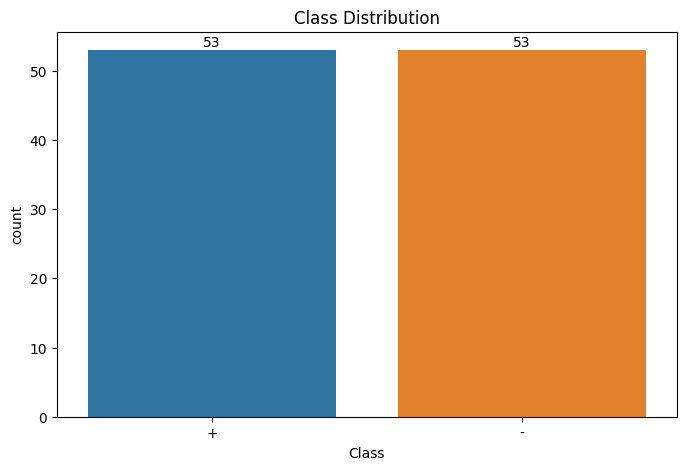

In [29]:
plt.figure(figsize = (8, 5))

bar_dna = sns.countplot(data = df_class, x = "Class", hue = "Class")

for i in bar_dna.patches:
   bar_dna.annotate(format(i.get_height(), f",.0f"),
                           (i.get_x() + i.get_width() / 2,
                           i.get_height() - 0.5), 
                           ha = "center", 
                           va = "center",
                           size = 10, 
                           xytext = (0, 8),
                           textcoords = "offset points")

bar_dna.set_title("Class Distribution")

plt.show()

In [30]:
dna_sequence = df_dna.columns[df_dna.columns != "Class"].to_frame()

In [31]:
np.random.seed(42)
random_sequences = dna_sequence.sample(n = 4).index.tolist()

random_sequences

['atgcgg', 'gcgttt', 'gttaat', 'caaggt']

In [32]:
len(random_sequences)

4

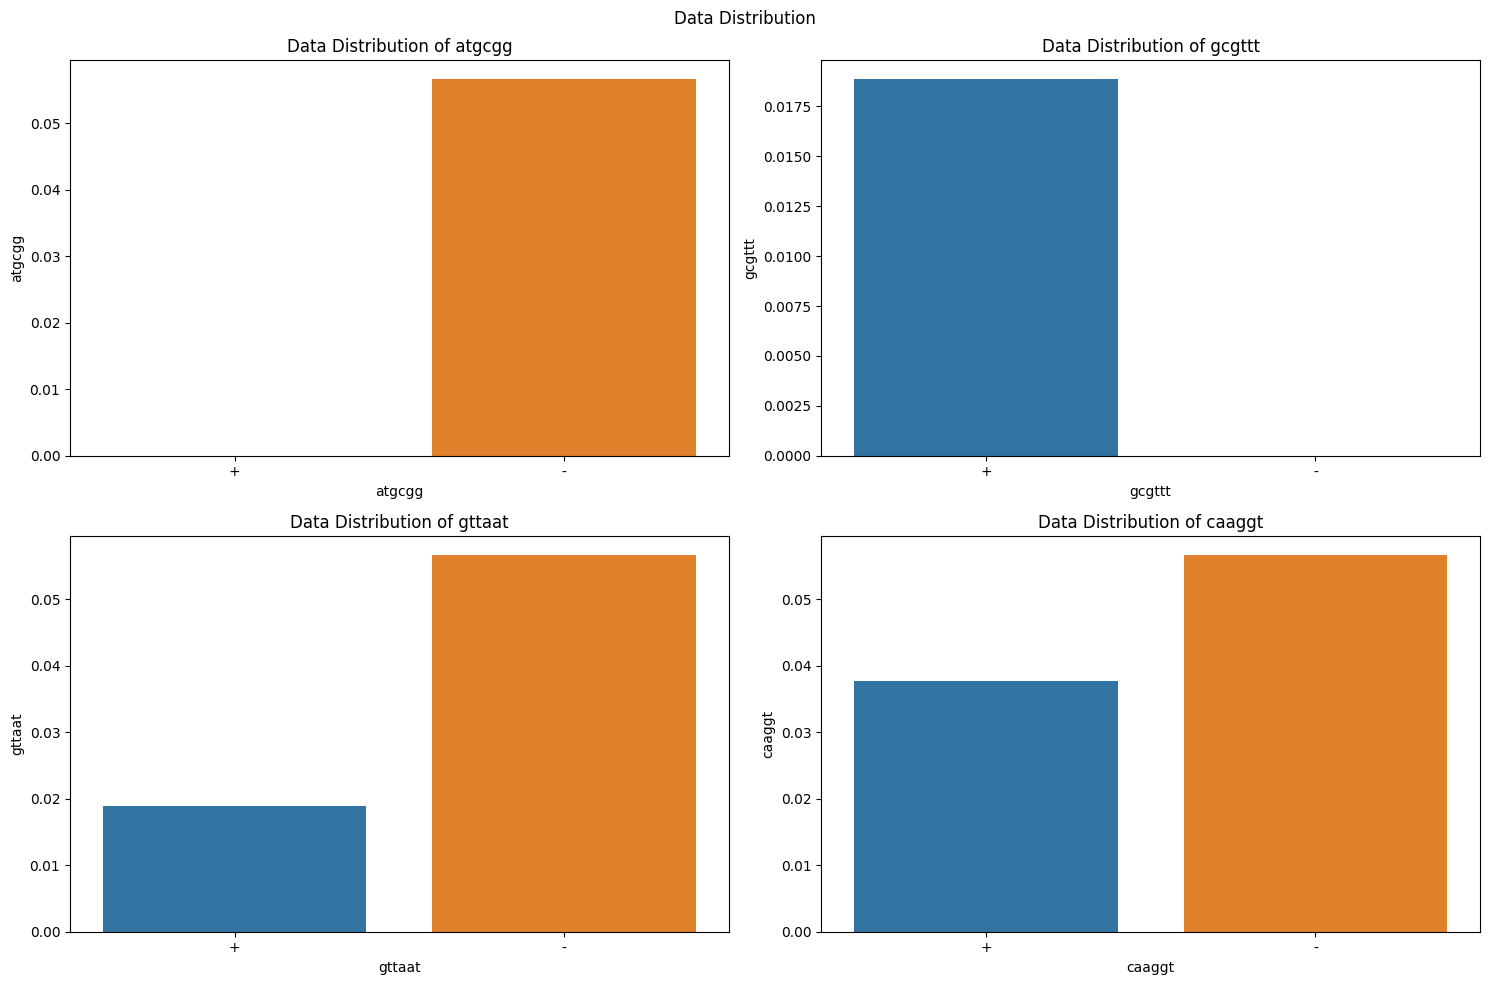

In [33]:
plt.figure(figsize=(15,10))
plt.suptitle("Data Distribution")

plot = 1

for i in random_sequences:
    plt.subplot(2, 2, plot)

    sns.barplot(data = df_dna, x = "Class", y = i, hue = "Class", ci = 0)

    plt.xlabel(i)
    plt.title(f"Data Distribution of {i}")
    plt.legend([],[], frameon = False)
    plot += 1


plt.tight_layout()

plt.show()

## **4. Define X and y**

In [34]:
# Convert class + = 1, class - = 0
df_dna["Class"] = df_dna["Class"].apply(lambda x: 0 if x == "-" else 1)
df_dna

,Class,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [35]:
X = df_dna.drop(columns = "Class")
y = df_dna["Class"]

In [36]:
X

,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,aaaagc,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
101    0
102    0
103    0
104    0
105    0
Name: Class, Length: 106, dtype: int64

## **5. Data Splitting**

In [38]:
# Data splitting library
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

In [40]:
X_train

,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,aaaagc,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train

102    0
25     1
3      1
22     1
49     1
      ..
70     0
64     0
76     0
96     0
92     0
Name: Class, Length: 84, dtype: int64

In [42]:
X_test

,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,aaaagc,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
13,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y_test

13     1
52     1
104    0
27     1
7      1
60     0
105    0
81     0
46     1
1      1
91     0
34     1
67     0
43     1
73     0
63     0
71     0
75     0
95     0
16     1
19     1
6      1
Name: Class, dtype: int64

## **6. Cross Validation**

In [44]:
# Scaling
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.pipeline import Pipeline

In [45]:
# Algorithm
from sklearn.svm import SVC

# Metric
from sklearn.metrics import classification_report, accuracy_score

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

In [46]:
svc_linear = SVC(kernel = "linear", random_state = 42)
svc_poly = SVC(kernel = "poly", random_state = 42)
svc_sigmoid = SVC(kernel = "sigmoid", random_state = 42)

In [47]:
list_algo = [svc_linear, svc_poly, svc_sigmoid]
list_all_acc = []
list_mean_acc = []
list_std_acc = []

for model in list_algo:

    # Define KFold 
    fold = StratifiedKFold(n_splits = 5)

    # Pipeline
    pipe_prep_model = Pipeline([
        ("scaling", StandardScaler()),
        ("modeling", model),
    ])

    # Cross validation score
    cross_val = cross_val_score(estimator = pipe_prep_model,    
                                X =  X_train,
                                y = y_train,
                                cv = fold,                      
                                scoring = "accuracy") 
    
    # List accuracy score & standard deviation
    list_all_acc.append(cross_val.round(2))
    list_mean_acc.append(cross_val.mean())
    list_std_acc.append(cross_val.std())

In [48]:
# DataFrame Cross Validation

df_cv = pd.DataFrame()
df_cv["Algorithm"] = list_algo
df_cv["All Score"] = list_all_acc
df_cv["Mean Score"] = list_mean_acc
df_cv["STD Score"] = list_std_acc

df_cv.sort_values("Mean Score", ascending = False)

,Algorithm,All Score,Mean Score,STD Score
0,"SVC(kernel='linear', random_state=42)","[1.0, 1.0, 0.94, 1.0, 0.88]",0.963235,0.049653
2,"SVC(kernel='sigmoid', random_state=42)","[1.0, 0.94, 1.0, 1.0, 0.88]",0.963235,0.049653
1,"SVC(kernel='poly', random_state=42)","[0.59, 0.59, 0.47, 0.53, 0.56]",0.547794,0.044240


## **7. Hyperparameter Tuning**

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Define model
model = svc_linear

# Hyperparamer Tuning
hyperparam = {
    "modeling__C" : [0.1, 1, 10, 100],
}

# Pipeline
pipe_prep_model = Pipeline([
    ("scaling", StandardScaler()),
    ("modeling", model),
])


# Gridsearch
gridsearch = GridSearchCV(
                        estimator = pipe_prep_model,
                        param_grid = hyperparam,
                        cv = 5,
                        n_jobs = -1,
                        scoring = "recall"
                        )

# Fitting gridsearch to X_train, y_train
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('modeling',
                                        SVC(kernel='linear',
                                            random_state=42))]),
             n_jobs=-1, param_grid={'modeling__C': [0.1, 1, 10, 100]},
             scoring='recall')

In [51]:
gridsearch.best_params_

{'modeling__C': 0.1}

In [52]:
gridsearch.best_score_

0.9777777777777779

In [76]:
# Define model
best_model = gridsearch.best_estimator_

# Fitting
best_model.fit(X_train, y_train)

# Predict to test
y_pred_test = best_model.predict(X_test)

# Accuracy score
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy score test = {acc_test}")

Accuracy score test = 0.9545454545454546


In [54]:
best_model = gridsearch.best_estimator_

In [55]:
df_feature_importance = pd.DataFrame()
df_feature_importance["Feature"] = X.columns
df_feature_importance["Score"] = best_model["modeling"].coef_.tolist()[0]

df_feature_importance = df_feature_importance.sort_values("Score", ascending = False)
df_feature_importance

,Feature,Score
1731,taatgc,0.007131
470,ataatg,0.007025
628,caaaaa,0.006947
627,attttt,0.006611
1,aaaaac,0.006438
...,...,...
381,agcctc,-0.007243
1132,ctgtga,-0.007371
57,aacatt,-0.007466
293,actacg,-0.007518


In [56]:
df_feature_importance[df_feature_importance["Score"] > 0]

,Feature,Score
1731,taatgc,7.130829e-03
470,ataatg,7.025007e-03
628,caaaaa,6.946599e-03
627,attttt,6.610806e-03
1,aaaaac,6.438021e-03
...,...,...
377,agccag,1.115561e-05
1504,ggcttg,1.984895e-06
376,agccaa,3.463549e-07
772,ccaatc,3.463549e-07


In [57]:
df_feature_importance[df_feature_importance["Score"] <= 0]

,Feature,Score
575,atgtgg,0.000000
541,atgacg,0.000000
1557,gtaaaa,0.000000
547,atgcaa,0.000000
550,atgcat,0.000000
...,...,...
381,agcctc,-0.007243
1132,ctgtga,-0.007371
57,aacatt,-0.007466
293,actacg,-0.007518


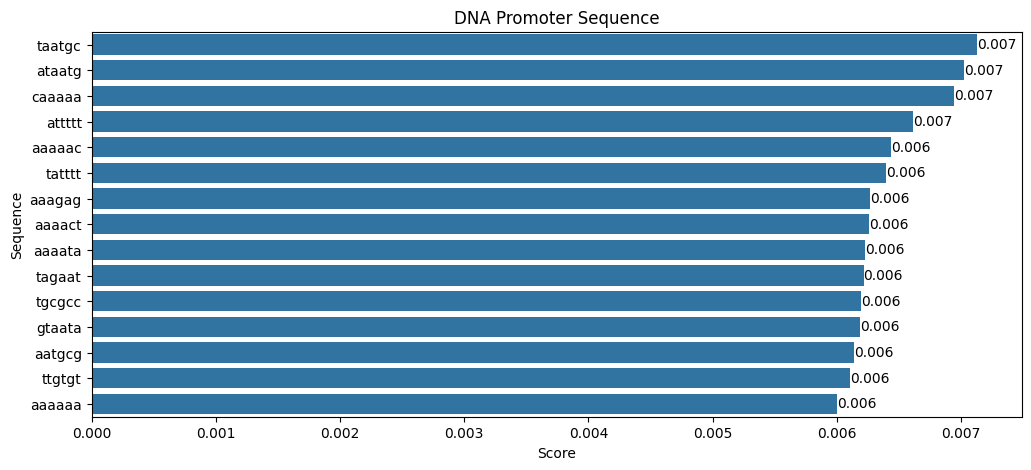

In [58]:
plt.figure(figsize = (12, 5))

plt.title("DNA Promoter Sequence")

bar_feature = sns.barplot(data = df_feature_importance.head(15), x = "Score", y = "Feature")

for index, value in enumerate(df_feature_importance.head(15)["Score"]):
    plt.text(x = value, y = index, s = round(value,3), va = "center")

plt.ylabel("Sequence")

plt.show()

In [59]:
df_dna[df_dna["taatgc"] > 0][["Class","taatgc"]]

,Class,taatgc
0,1,1
9,1,1
12,1,1
13,1,1
14,1,1
16,1,1
35,1,1
37,1,1
39,1,1


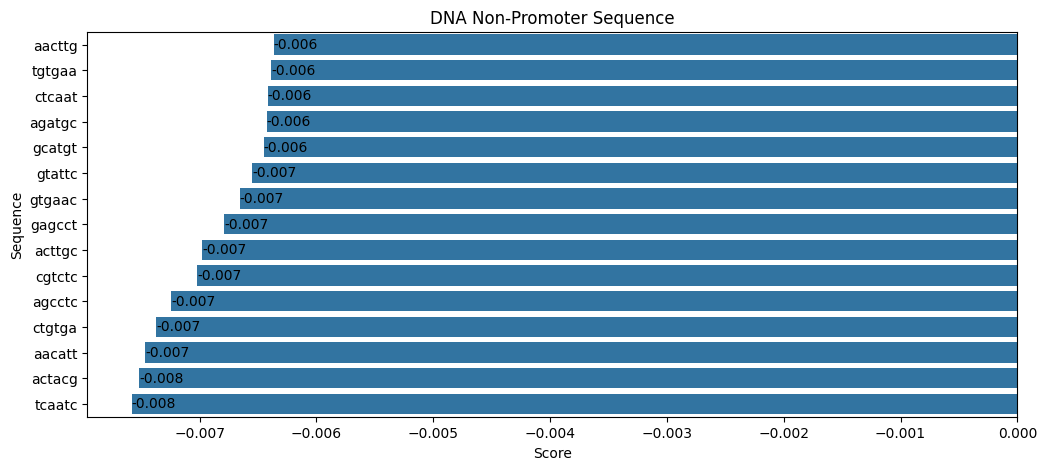

In [75]:
plt.figure(figsize = (12, 5))

plt.title("DNA Non-Promoter Sequence")

bar_feature = sns.barplot(data = df_feature_importance.tail(15), x = "Score", y = "Feature")

for index, value in enumerate(df_feature_importance.tail(15)["Score"]):
    plt.text(x = value, y = index, s = round(value,3), va = "center")

plt.ylabel("Sequence")

plt.show()

In [61]:
df_dna[df_dna["tcaatc"] > 0][["Class","tcaatc"]]

,Class,tcaatc
54,0,1
58,0,1
60,0,1
67,0,1
68,0,1
78,0,1
82,0,1
98,0,1
102,0,1
105,0,1


https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0

---

taatgc, tcaatc

In [62]:
df_plot = df_dna[["taatgc", "tcaatc", "Class"]]
df_plot 

,taatgc,tcaatc,Class
0,1,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
101,0,0,0
102,0,1,0
103,0,0,0
104,0,0,0


In [63]:
df_plot = df_plot[(df_plot["taatgc"] > 0) | (df_plot["tcaatc"] > 0)]
df_plot

,taatgc,tcaatc,Class
0,1,0,1
9,1,0,1
12,1,0,1
13,1,0,1
14,1,0,1
16,1,0,1
35,1,0,1
37,1,0,1
39,1,0,1
54,0,1,0


In [64]:
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [65]:
X_train_pc = df_plot.drop(columns = "Class")
y_train_pc = df_plot["Class"]

In [66]:
X_train_pc

,taatgc,tcaatc
0,1,0
9,1,0
12,1,0
13,1,0
14,1,0
16,1,0
35,1,0
37,1,0
39,1,0
54,0,1


In [67]:
X_train_pc.iloc[:, 0]

0      1
9      1
12     1
13     1
14     1
16     1
35     1
37     1
39     1
54     0
58     0
60     0
67     0
68     0
78     0
82     0
98     0
102    0
105    0
Name: taatgc, dtype: int64

In [68]:
X_train_pc.iloc[:, 1]

0      0
9      0
12     0
13     0
14     0
16     0
35     0
37     0
39     0
54     1
58     1
60     1
67     1
68     1
78     1
82     1
98     1
102    1
105    1
Name: tcaatc, dtype: int64

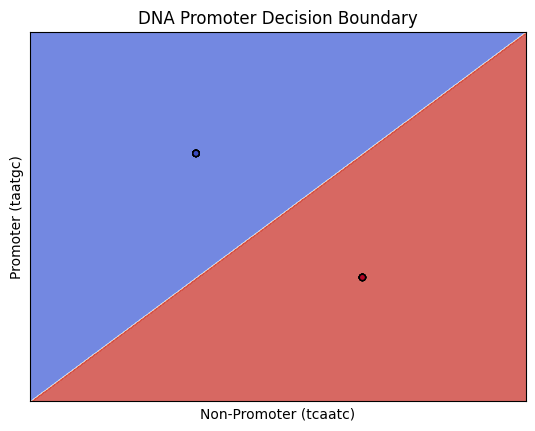

In [69]:
# Create the model and train it using principal component features
clf = best_model.fit(X_train_pc, y_train_pc)

# Set-up grid for plotting.
fig, ax = plt.subplots()
X0, X1 = X_train_pc.iloc[:, 0], X_train_pc.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Create the plot
plot_contours(ax, clf, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
ax.scatter(X0, X1, c = y_train_pc, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_ylabel("Promoter (taatgc)")
ax.set_xlabel("Non-Promoter (tcaatc)")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("DNA Promoter Decision Boundary")
plt.show()